# Adding Noise to a Signal

Suppose we wish to add noise to a signal at a specific signal-to-noise ratio (SNR).

The following notebook serves as an example for how one may decide to add noise to a signal at a specific SNR using functionality from `nowcastlib.signals` such as `normalize_signal` and `add_noise`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nowcastlib as ncl

In [2]:
sns.set_style("ticks")
sns.set_context("notebook")

In [3]:
# The SNR we want to achieve, in dB
target_snr = 2

For this specific example, we will use a mixed-noise signal, made out of the addition of white noise and red noise.

In [4]:
# Normalize red noise so that it is in a similar range as white noise
white_noise = np.random.randn(5000)
red_noise = ncl.signals.normalize_signal(np.random.randn(5000).cumsum())
# We may wish build our noise signal such that it is dominated by a particular color
rn_weight = 1
wn_weight = 1
# finally we can build our noise signal
total_noise = wn_weight * white_noise + rn_weight * red_noise

As for our "noiseless" signal, to which we wish to add noise, we will use a sinusoidal wave

In [5]:
T = 5000
x = np.arange(T)
b = 5
example_signal = np.sin((2 * np.pi * b * x) / T)

In [6]:
# We add noise to the signal using the target SNR specified earlier
noise_and_signal = ncl.signals.add_noise(example_signal, total_noise, target_snr)

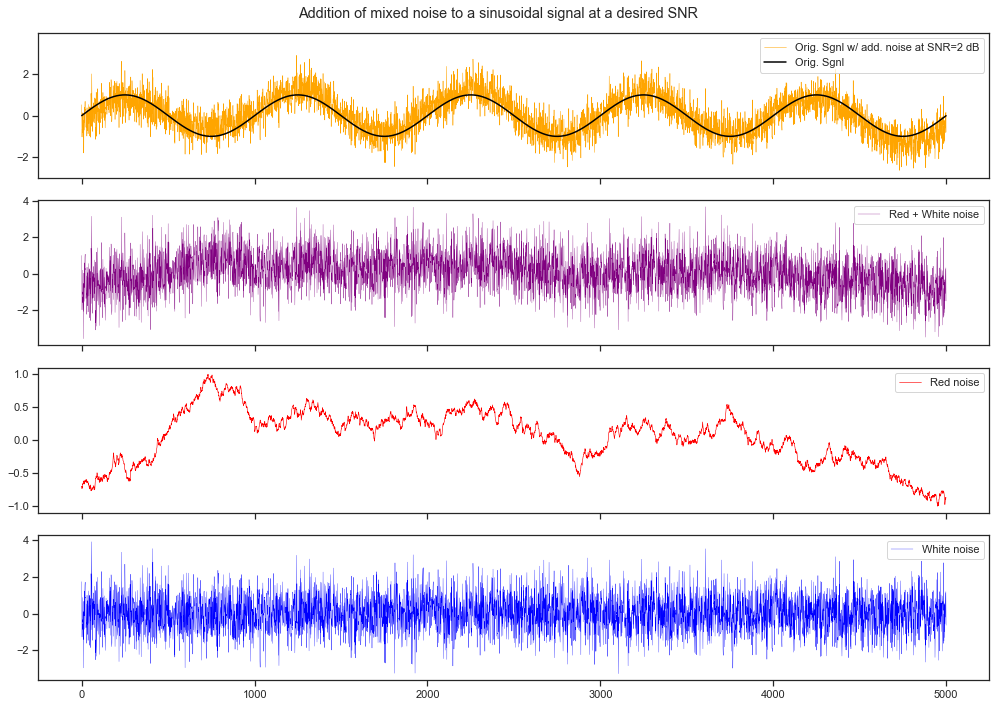

In [10]:
# Plot to see the effect of our work
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(14, 10))
ax1.plot(
    noise_and_signal,
    linewidth=0.5,
    color="orange",
    label="Orig. Sgnl w/ add. noise at SNR={} dB".format(target_snr),
)
ax1.plot(example_signal, color="black", label="Orig. Sgnl")
ax1.set_ylim([-3, 4])
ax1.set_yticks([-2, 0, 2])
ax1.legend()
ax2.plot(total_noise, color="purple", linewidth=0.3, label="Red + White noise")
ax2.legend()
ax3.plot(red_noise, color="red", linewidth=0.6, label="Red noise")
ax3.legend()
ax4.plot(white_noise, color="blue", linewidth=0.3, label="White noise")
ax4.legend()
f.suptitle("Addition of mixed noise to a sinusoidal signal at a desired SNR")
f.set_tight_layout(True)
plt.show()